In [1]:
from lenskit.metrics import dataGenerator
from lenskit import batch, topn, util, topnFair
from lenskit import crossfold as xf
from lenskit.algorithms import Recommender, als, user_knn as knn
from lenskit import topn, topnFair

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
import math

In [4]:
#ratings = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/ratings.1.csv', sep=',',
#                      names=['user', 'item', 'rating', 'timestamp'], header=0)

#items = pd.read_csv('/Users/denisehansen/Desktop/ITU/Thesis/Fair-Recommendations/ml-latest-small/movies.csv', sep=',',
#                      names=['movieId','title','genres'], header=0)

ratings = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/ml-latest-small/ratings.1.csv', sep=',',
                      names=['user', 'item', 'rating', 'timestamp'], header=0)

items = pd.read_csv('/Users/josse/Git-kode projects/Speciale/Fair-Recommendations/ml-latest-small/movies.csv', sep=',',
                      names=['item','title','genres'], header=0)

#C:\Users\josse\Git-kode projects\Speciale\Fair-Recommendations\ml-latest-small\ratings.csv

In [5]:
#items

In [6]:
items_dummy = pd.concat([items, items['genres'].str.get_dummies(sep='|')], axis=1)
items_dummy.head()

,item,title,genres,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
algo_ii = knn.UserUser(20)
algo_als = als.BiasedMF(50)

In [8]:
def eval(aname, algo, train, test):
    fittable = util.clone(algo)
    fittable = Recommender.adapt(fittable)
    fittable.fit(train)
    users = test.user.unique()
    # now we run the recommender
    recs = batch.recommend(fittable, users, 100)
    # add the algorithm name for analyzability
    recs['Algorithm'] = aname
    return recs

In [9]:
all_recs = []
test_data = []
for train, test in xf.partition_users(ratings[['user', 'item', 'rating']], 1, xf.SampleFrac(0.2)):
    test_data.append(test)
    all_recs.append(eval('ItemItem', algo_ii, train, test))
    all_recs.append(eval('ALS', algo_als, train, test))
   
    

test _reccomend
test _reccomend


In [10]:
all_recs = pd.concat(all_recs, ignore_index=True)
all_recs_joined = all_recs.join(items_dummy.set_index('item'), on='item')
all_recs_joined.head()

,item,score,user,rank,Algorithm,title,genres,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3265,3.193827,1,1,ItemItem,Hard-Boiled (Lat sau san taam) (1992),Action|Crime|Drama|Thriller,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,2080,3.193827,1,2,ItemItem,Lady and the Tramp (1955),Animation|Children|Comedy|Romance,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2000,3.193827,1,3,ItemItem,Lethal Weapon (1987),Action|Comedy|Crime|Drama,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1079,3.193827,1,4,ItemItem,"Fish Called Wanda, A (1988)",Comedy|Crime,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1073,3.193827,1,5,ItemItem,Willy Wonka & the Chocolate Factory (1971),Children|Comedy|Fantasy|Musical,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [11]:
test_data = pd.concat(test_data, ignore_index=True)
test_data.head()

,user,item,rating
0,1,31,2.5
1,1,1172,4.0
2,1,1343,2.0
3,1,1293,2.0
4,2,500,4.0


In [12]:
_protected_group2 = all_recs_joined.loc[all_recs_joined['Action'] == 1]
_protected_group2.head()
_protected_group2['item'].values

array([ 3265,  2000,  2005,  1036,  1291,  1220,  1210,  1200,  1197,
        1387,  1127,  2115,  1240,   480,  2991,   349,   112,   541,
        2194,  2406,  2723,  2628,  2640,   589,  2716,   610,   367,
         434,   153,   442,  1197,  2005,  2000,  1953,  1387,  2723,
        2640,  2628,  2406,  2194,  2115,  1127,   112,   541,  1036,
        1200,  1220,  1240,  1291,  3265,  2991,   589,  1291,  3265,
        1387,  1240,  2005,  1953,  2000,  1220,   112,   541,  1036,
        1127,  1200,  2723,  2991,  2194,  2406,  2628,  2640,  2115,
         480,   349,  8636,   110,  2028,  1378, 33679,  2273,  8644,
        1580, 44191,   736,   589,  3265,  1291,  1387,  2005,  1953,
        2000,  1220,  1200,  1036,   112,   541,  1127,  1197,  1210,
        1240,  2640,  2723,  2194,  2716,  2406,  2991,  2628,  2115,
         480,   349,   110,  1197,   589,  1240,  2406,  2628,  2640,
        1220,  1200,  2723,  2194,  2000,  1387,  2005,  2115,  1291,
        1127,  3265,

In [13]:
recs_temp = all_recs_joined.iloc[100:110,:]
recs_temp 


,item,score,user,rank,Algorithm,title,genres,(no genres listed),Action,Adventure,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
100,3949,4.902239,2,1,ItemItem,Requiem for a Dream (2000),Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
101,318,4.902239,2,2,ItemItem,"Shawshank Redemption, The (1994)",Crime|Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102,33166,4.525410,2,3,ItemItem,Crash (2004),Crime|Drama,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103,1035,4.525410,2,4,ItemItem,"Sound of Music, The (1965)",Musical|Romance,0,0,0,...,0,0,0,1,0,1,0,0,0,0
104,1197,4.428500,2,5,ItemItem,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,0,1,1,...,0,0,0,0,0,1,0,0,0,0
105,48783,4.402239,2,6,ItemItem,Flags of Our Fathers (2006),Drama|War,0,0,0,...,0,0,0,0,0,0,0,0,1,0
106,296,4.238436,2,7,ItemItem,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,0,0,0,...,0,0,0,0,0,0,0,1,0,0
107,1380,4.211096,2,8,ItemItem,Grease (1978),Comedy|Musical|Romance,0,0,0,...,0,0,0,1,0,1,0,0,0,0
108,1721,4.161115,2,9,ItemItem,Titanic (1997),Drama|Romance,0,0,0,...,0,0,0,0,0,1,0,0,0,0
109,2064,4.137987,2,10,ItemItem,Roger & Me (1989),Documentary,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
def calculate_demParity(recs, protected_group): 
    #beslut hvad der er nemmest. Skal denne tage "protected group". contains eller tage en protected variabel?
    
    exposure_pro = 0; 
    exposure_unpro = 0;
    print(_protected_group2['item'].values)

    for index, row in recs.iterrows():
        if row["item"] in _protected_group2['item'].values:
            print(row["item"], "in protected group")
            exposure_pro = exposure_pro + (1/math.log2(1+row["rank"])) 
        else:
            exposure_unpro = exposure_unpro + (1/math.log2(1+row["rank"]))  
   
    return abs(exposure_pro-exposure_unpro)

In [15]:
x = calculate_demParity(recs_temp, _protected_group2)
x 

[ 3265  2000  2005  1036  1291  1220  1210  1200  1197  1387  1127  2115
  1240   480  2991   349   112   541  2194  2406  2723  2628  2640   589
  2716   610   367   434   153   442  1197  2005  2000  1953  1387  2723
  2640  2628  2406  2194  2115  1127   112   541  1036  1200  1220  1240
  1291  3265  2991   589  1291  3265  1387  1240  2005  1953  2000  1220
   112   541  1036  1127  1200  2723  2991  2194  2406  2628  2640  2115
   480   349  8636   110  2028  1378 33679  2273  8644  1580 44191   736
   589  3265  1291  1387  2005  1953  2000  1220  1200  1036   112   541
  1127  1197  1210  1240  2640  2723  2194  2716  2406  2991  2628  2115
   480   349   110  1197   589  1240  2406  2628  2640  1220  1200  2723
  2194  2000  1387  2005  2115  1291  1127  3265   112  1036   541  2991
   349   480  1387  2005  2000  2115  2194  2406  2628  2640  2723  1036
   541   112  1127  1200  1220  1240  1291  2991  3265  1197  1953  1210
  2716   367  2683  1917  2094   610  1953  2005  2

3.7698537236192626

In [16]:
# user , algorithms = iput to group_cols --> de koloner der skal  groupes på 
res= list(all_recs_joined.iloc[:,8:])
print(res)

rla = topnFair.FairRecListAnalysis(['user', "Algorithm"])
rla.add_metric("rND")
rla.add_metric("rKL")
rla.add_metric("rRD")
rla.add_metric("div")
rla.add_metric("dem_parity")
results = rla.compute(all_recs_joined, test_data, res)
results.head()

['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
ti_cols:  ['user', 'item']
res.index:  MultiIndex(levels=[[1, 2, 3, 4, 5], ['ALS', 'ItemItem']],
           labels=[[0, 0, 1, 1, 2, 2, 3, 3, 4, 4], [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]],
           names=['user', 'Algorithm'])
                rND  rKL  rRD  div  dem_parity
user Algorithm                                
1    ALS        NaN  NaN  NaN  NaN         NaN
     ItemItem   NaN  NaN  NaN  NaN         NaN
2    ALS        NaN  NaN  NaN  NaN         NaN
     ItemItem   NaN  NaN  NaN  NaN         NaN
3    ALS        NaN  NaN  NaN  NaN         NaN
calculating normalizer with userN= 100 , proN 23 , measure rND
normalizer value to return :  0.6626178144669475
calculating normalizer with userN= 100 , proN 23 , measure rKL
normalizer value to return :  0.5951387543485855
calculating normali

rND       rKL       rRD       div  dem_parity
user Algorithm                                                    
1    ALS        0.095429  0.044110  0.135248  0.947368    0.296032
     ItemItem   0.231048  0.088136  0.341974  0.894737    0.451069
2    ALS        0.162160  0.061452  0.291290  0.894737    0.328401
     ItemItem   0.142995  0.060046  0.111109  0.894737    0.253683
3    ALS        0.126715  0.048619  0.004547  0.894737    0.329147

In [17]:
results.groupby('Algorithm').rND.mean()

Algorithm
ALS         0.120281
ItemItem    0.146623
Name: rND, dtype: float64

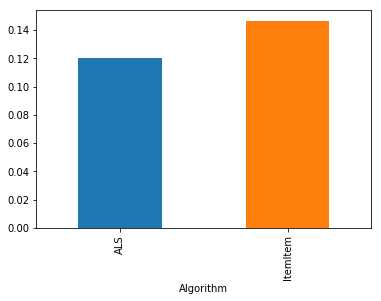

In [18]:
results.groupby('Algorithm').rND.mean().plot.bar()


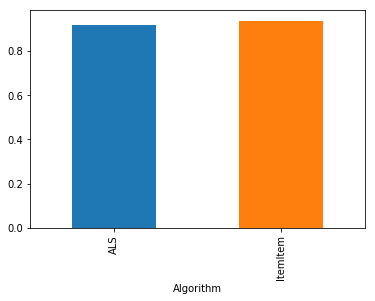

In [19]:
results.groupby('Algorithm').div.mean().plot.bar()